# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [ ]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Question 1

**Explain how you solve the model**

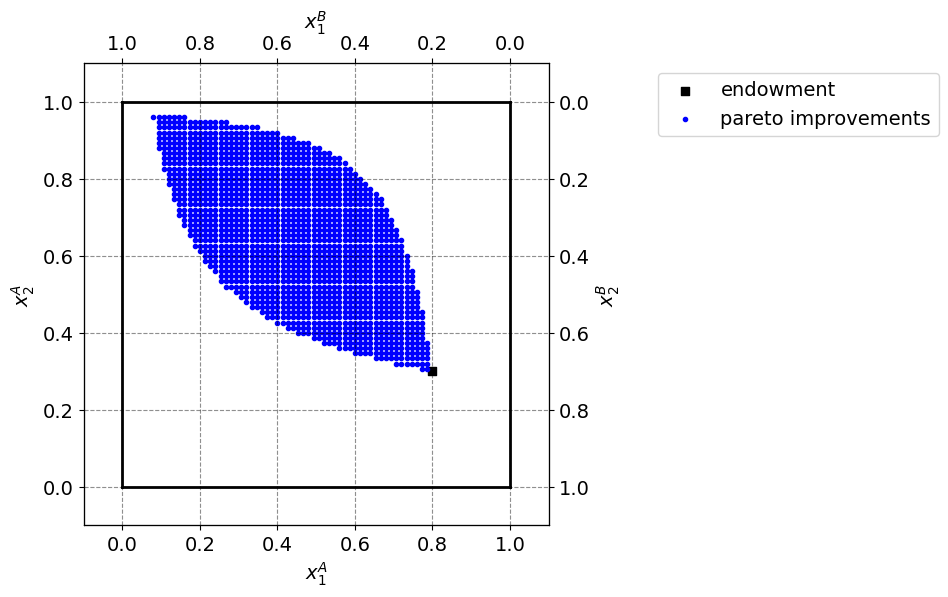

In [142]:
import matplotlib.pyplot as plt
from types import SimpleNamespace


model = ExchangeEconomyClass()


# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(model.par.w1A, model.par.w2A, marker='s', color='black', label='endowment')
ax_A.scatter(list_x1A, list_x2A, marker='.', color='blue', label='pareto improvements')

# limits
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.86,1.0))

plt.show()

# Question 2

Explain your code and procedure

In [ ]:
# Define p1 as an empty list 
p1 = []

# Use loop to make the p1 valueset
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

# Ensure the values in the p1 list by printing 
print(p1) 

# Make error an empty list
error = []

# Calculate errors given by eps1 and eps2 by using the clearing condition which is given as: check_market_clearing from ExchangeEconomy.py 
for i in p1:
    error.append(model.check_market_clearing(i))

# See  the values of eps1 and eps2 from 1-10
print(error[0:10])

# Make the error list into two list calles error1 and error2 
error1,error2 = zip(*error)

# plot of errors 
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_C = fig.add_subplot(1, 1, 1)

ax_C.set_ylabel("Error under market clearing")
ax_C.set_xlabel("$p_1$")
ax_C.set_title("Market Clearing errors under $\mathcal{P}_1$")

ax_C.plot(p1, error1, label = '$\epsilon_1(p,\omega)$')
ax_C.plot(p1, error2, label = '$\epsilon_2(p,\omega)$')
ax_C.legend()

# Question 3

Explain your code and procedure

In [183]:
from scipy.optimize import minimize_scalar
from ExchangeEconomy import ExchangeEconomyClass  # Replace 'ExchangeEconomy' with the actual name of your Python file

# Instantiate the ExchangeEconomyClass
model = ExchangeEconomyClass()



# Define the optimization function (market_clearing_error)
def error_function(p1):
    return model.market_clearing_error(p1)

# Define the bounds for p1
bounds = (0.5, 2.5)  # Tuple containing the lower and upper bounds for p1

# Minimize the error function with bounds using minimize_scalar
result = minimize_scalar(error_function, bounds=bounds)

# Extract the optimal value of p1
optimal_p1 = result.x

# Print the result
print(f"Value of p1: {optimal_p1}")

Value of p1: 0.6123735629362579


ADD CONCISE CONLUSION.

# Question 4a

In [187]:
from scipy.optimize import minimize_scalar

from types import SimpleNamespace


model = ExchangeEconomyClass()

# Define the utility function for agent A
def utility_A(p1):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 not in bounds:
        return float('inf')  # Return a large value to penalize if p1 is not in P1
    return -utility_A(p1, model.par.w2B)

# Find the price that maximizes agent A's utility within P1
result = minimize_scalar(objective_function, bounds=bounds, method='bounded')

# Extract the optimal price
optimal_price_p1 = result.x

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)

print("Optimal price agent A:", optimal_price_p1)
print("Optimal allocation agent A (1-xB1, 1-xB2):", optimal_allocation_A)

Optimal price agent A: 2.4999960023848327
Optimal allocation agent A (1-xB1, 1-xB2): (0.3866665387427768, 0.23333439936404454)


# Question 4b

In [218]:
from scipy.optimize import minimize
from ExchangeEconomy import ExchangeEconomyClass

# Instantiate the ExchangeEconomyClass
model = ExchangeEconomyClass()


# Define the utility function for agent A
def utility_A(p1):
    x1B, x2B = model.demand_B(p1)
    return model.utility_A(1 - x1B, 1 - x2B)

# Define the objective function to be maximized
def objective_function(p1):
    if p1 <= 0:
        return float('inf')  # Return a large value to penalize if p1 is not positive
    return -utility_A(p1)

# Find the price that maximizes agent A's utility within the specified bounds
result = minimize(objective_function, x0=[3.0], bounds=[(0, None)])

# Extract the optimal price
optimal_price_p1 = result.x[0]

# Calculate the corresponding allocation
optimal_x1B, optimal_x2B = model.demand_B(optimal_price_p1)
optimal_allocation_A = (1 - optimal_x1B, 1 - optimal_x2B)

print("Optimal price agent A:", optimal_price_p1)
print("Optimal allocation agent A (1-xB1, 1-xB2):", optimal_allocation_A)


Optimal price agent A: 0.9642918158121485
Optimal allocation agent A (1-xB1, 1-xB2): (0.2592605716231704, 0.642855515783427)


/Users/annastenild/Desktop/projects-2024-karotennaanna/inauguralproject/ExchangeEconomy.py:20: RuntimeWarning: invalid value encountered in power
  return x1A**alpha*x2A**(1-alpha)


In [227]:
from scipy.optimize import minimize_scalar
from ExchangeEconomy import ExchangeEconomyClass

# Instantiate the ExchangeEconomyClass
model = ExchangeEconomyClass()

# Define the utility function for agent A
def utility_A(p1):
    x1A, x2A = model.demand_A(p1)
    return model.utility_A(x1A, x2A)

# Define the negative utility function for minimization
def neg_utility_A(p1):
    return -utility_A(p1)

# Find the price that maximizes agent A's utility
result = minimize_scalar(neg_utility_A, bounds=(0, 5), method='bounded')

# Extract the optimal price
optimal_price_p1 = result.x

# Calculate the corresponding allocation
optimal_x1A, optimal_x2A = model.demand_A(optimal_price_p1)

# Calculate the utility for agent A
optimal_utility_A = utility_A(optimal_price_p1)

# Print the results
print("Optimal price p1 for maximizing agent A's utility:", optimal_price_p1)
print("Optimal allocation x1A:", optimal_x1A)
print("Optimal allocation x2A:", optimal_x2A)
print("Utility for agent A at optimal allocation:", optimal_utility_A)

Optimal price p1 for maximizing agent A's utility: 4.999996371653228
Optimal allocation x1A: 0.2866666811800643
Optimal allocation x2A: 2.8666647315483886
Utility for agent A at optimal allocation: 1.3305882226224344


hejhejhej

In [ ]:
def python123(p1):
    return "er træls"